<a href="https://colab.research.google.com/github/mahim09/DLM/blob/main/White_Blood_cells_of_the_juvenile_Visayan_Warty_Pig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.applications.vgg19 import VGG19
import numpy as np
import pandas as pd
import PIL.Image as Image
import os
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.utils.multiclass import unique_labels

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"/content/drive/MyDrive/Colab Notebooks/Pigcell",
image_size= (IMAGE_SIZE, IMAGE_SIZE),
shuffle=True, seed=123, batch_size= BATCH_SIZE
)

Found 1536 files belonging to 5 classes.


In [ ]:
class_names=dataset.class_names
class_names

['01 Neutrophil',
 '02 Lymphocyte',
 '03 Monocyte',
 '04 Eosinophil',
 '05 Basophil']

In [ ]:
len(dataset)

24

In [ ]:
train_ds = dataset.take(17)
len(train_ds)

17

In [ ]:
rm_ds = dataset.skip(17)
len(rm_ds)

7

In [ ]:
val_ds = rm_ds.take(3)
len(val_ds)

3

In [ ]:
test_ds = rm_ds.skip(3)
len(test_ds)

4

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
training_ds = train_ds.map(
lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 222, 222, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (64, 111, 111, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (64, 109, 109, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 54, 54, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (64, 52, 52, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
import time
start = time.time()
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)
print("Total time: ", time.time() - start, "seconds")

Epoch 1/50
17/17 [==============================] - 28s 1s/step - loss: 1.2341 - accuracy: 0.5616 - val_loss: 1.0908 - val_accuracy: 0.6354
Epoch 2/50
17/17 [==============================] - 17s 837ms/step - loss: 1.2138 - accuracy: 0.5864 - val_loss: 1.0758 - val_accuracy: 0.6510
Epoch 3/50
17/17 [==============================] - 13s 672ms/step - loss: 1.1842 - accuracy: 0.5873 - val_loss: 1.1394 - val_accuracy: 0.6146
Epoch 4/50
17/17 [==============================] - 13s 673ms/step - loss: 1.1823 - accuracy: 0.5892 - val_loss: 1.1835 - val_accuracy: 0.5938
Epoch 5/50
17/17 [==============================] - 13s 667ms/step - loss: 1.1767 - accuracy: 0.5901 - val_loss: 0.9699 - val_accuracy: 0.6875
Epoch 6/50
17/17 [==============================] - 13s 675ms/step - loss: 1.1978 - accuracy: 0.5827 - val_loss: 1.2049 - val_accuracy: 0.5833
Epoch 7/50
17/17 [==============================] - 14s 718ms/step - loss: 1.1529 - accuracy: 0.5938 - val_loss: 1.1588 - val_accuracy: 0.6146
Ep

In [ ]:
model.save('Pig Cells.h5')

In [ ]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 5s 138ms/step - loss: 3.0245e-04 - accuracy: 1.0000


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

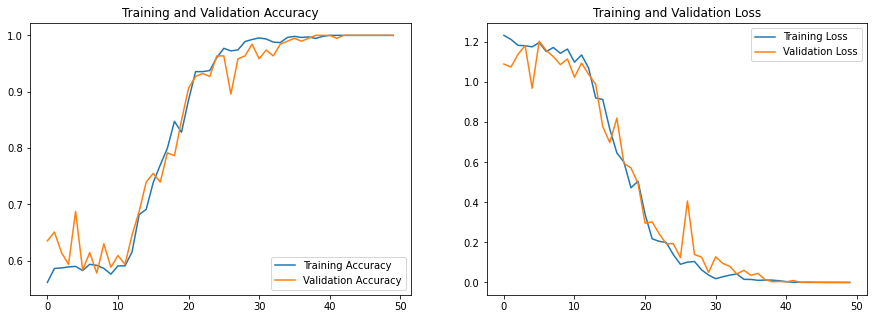

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

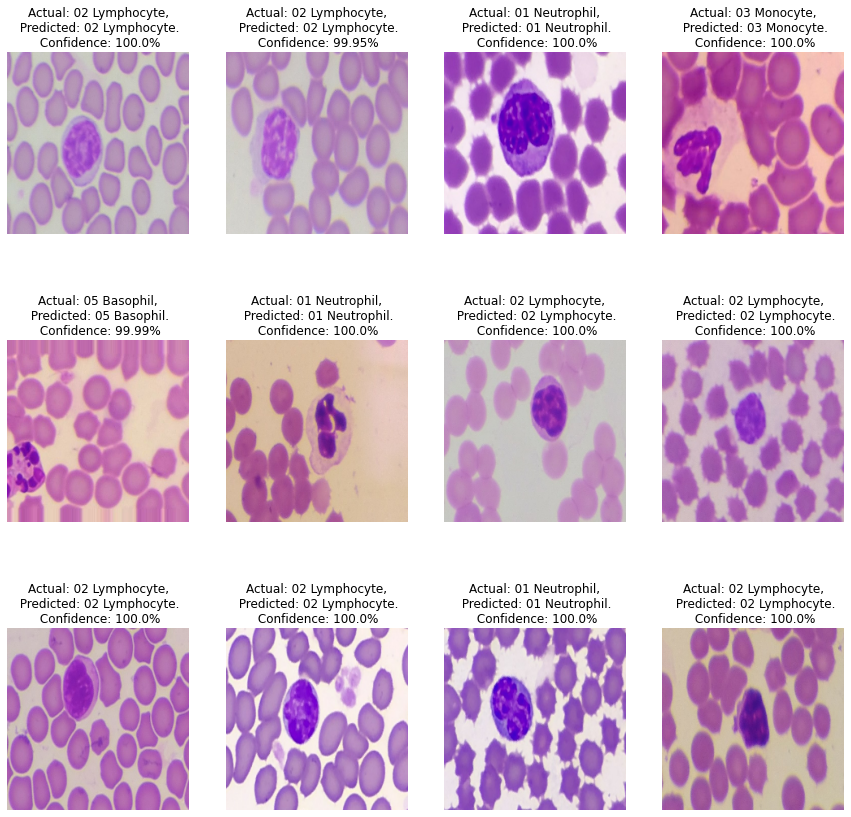

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    x_test1 = images_batch.numpy().astype('uint8')
    y_test1 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted1 = np.argmax(batch_prediction,axis=1)

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(2):
    x_test2 = images_batch.numpy().astype('uint8')
    y_test2 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted2 = np.argmax(batch_prediction,axis=1)

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(3):
    x_test3 = images_batch.numpy().astype('uint8')
    y_test3 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted3 = np.argmax(batch_prediction,axis=1)

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(4):
    x_test4 = images_batch.numpy().astype('uint8')
    y_test4 = labels_batch.numpy()
    batch_prediction = model.predict(images_batch)
    y_predicted4 = np.argmax(batch_prediction,axis=1)

In [ ]:
x_test = np.concatenate((x_test1, x_test2, x_test3, x_test4),axis = 0)

In [ ]:
z = x_test.reshape(-1,1)

In [ ]:
y_test = np.hstack((y_test1, y_test2, y_test3, y_test4))

In [ ]:
y_predict = np.hstack((y_predicted1, y_predicted2, y_predicted3, y_predicted4))

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       157
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        25

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



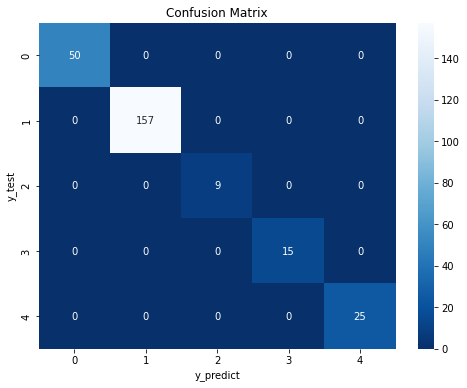

In [ ]:
cm_df=pd.DataFrame(cm,index=['0','1','2','3','4'],columns=['0','1','2','3','4'])
plt.figure(figsize=(8,6))
import seaborn as sns
sns.heatmap(cm_df,annot=True,fmt='d',cmap='Blues_r')
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
tf.math.confusion_matrix(
    y_test, y_predict, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 50,   0,   0,   0,   0],
       [  0, 157,   0,   0,   0],
       [  0,   0,   9,   0,   0],
       [  0,   0,   0,  15,   0],
       [  0,   0,   0,   0,  25]], dtype=int32)>

In [ ]:
for images_batch, labels_batch in train_ds.take(1):
    x_train1 = images_batch.numpy().astype('uint8')
    y_train1 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(2):
    x_train2 = images_batch.numpy().astype('uint8')
    y_train2 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(3):
    x_train3 = images_batch.numpy().astype('uint8')
    y_train3 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(4):
    x_train4 = images_batch.numpy().astype('uint8')
    y_train4 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(5):
    x_train5 = images_batch.numpy().astype('uint8')
    y_train5 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(6):
    x_train6 = images_batch.numpy().astype('uint8')
    y_train6 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(7):
    x_train7 = images_batch.numpy().astype('uint8')
    y_train7 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(8):
    x_train8 = images_batch.numpy().astype('uint8')
    y_train8 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(9):
    x_train9 = images_batch.numpy().astype('uint8')
    y_train9 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(10):
    x_train10 = images_batch.numpy().astype('uint8')
    y_train10 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(11):
    x_train11 = images_batch.numpy().astype('uint8')
    y_train11 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(12):
    x_train12 = images_batch.numpy().astype('uint8')
    y_train12 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(13):
    x_train13 = images_batch.numpy().astype('uint8')
    y_train13 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(14):
    x_train14 = images_batch.numpy().astype('uint8')
    y_train14 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(15):
    x_train15 = images_batch.numpy().astype('uint8')
    y_train15 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(16):
    x_train16 = images_batch.numpy().astype('uint8')
    y_train16 = labels_batch.numpy()

In [ ]:
for images_batch, labels_batch in train_ds.take(17):
    x_train17 = images_batch.numpy().astype('uint8')
    y_train17 = labels_batch.numpy()

In [ ]:
x_train = np.concatenate((x_train1, x_train2, x_train3, x_train4, x_train5, x_train6, x_train7, x_train8, x_train9, x_train10, x_train11, x_train12, x_train13, x_train14, x_train15, x_train16, x_train17),axis = 0)

In [ ]:
y_train = np.concatenate((y_train1, y_train2, y_train3, y_train4, y_train5, y_train6, y_train7, y_train8, y_train9, y_train10, y_train11, y_train12, y_train13, y_train14, y_train15, y_train16, y_train17),axis = 0)

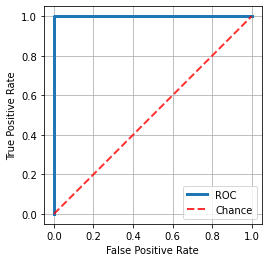

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
def plot_roc(t):
    y_pred_prob = y_predict
    y_true = y_test

    fp, tp, _ = roc_curve(y_true, y_pred_prob, pos_label= 4 )

    plt.plot(fp, tp, label='ROC', linewidth=3)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(
      [0, 1], [0, 1], 
      linestyle='--', 
      linewidth=2, 
      color='r',
      label='Chance', 
      alpha=.8
    )
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.legend(loc="lower right")
    
plot_roc(test_ds)
plt.savefig('ROC2.png', dpi=500)